In [26]:
url = "https://www.motor.no/bil/sjekk-motors-rekkevidde-resultater-bilmodell-for-bilmodell/202424"

In [27]:
from bs4 import BeautifulSoup
import requests

def fetch_html_tables(url):
    "Returns a list of tables in the html of url"
    page = requests.get(url)
    bs=BeautifulSoup(page.content)
    tables=bs.find_all('table')
    return tables
tables=fetch_html_tables('https://www.motor.no/bil/sjekk-motors-rekkevidde-resultater-bilmodell-for-bilmodell/202424')
table_html=tables[0]

In [28]:
print(str(table_html)[:1000])

<table class="">
<thead>
<tr>
<td>
            
            Bilmodell
            </td>
<td>
            
            Test
            </td>
<td>
            
            Rekkevidde i testen
            </td>
<td>
            
            Oppgitt WLTP
            </td>
<td>
            
            Avvik i prosent
            </td>
<td>
            
            Forbruk (målt) kWt/ 100km
            </td>
<td>
            
            Forbruk (oppgitt) kWt/ 100km
            </td>
<td>
            
            Utstyrsnivå
            </td>
</tr>
</thead>
<tbody>
<tr><td>Audi e-tron 55</td><td>Sommer 2020</td><td>399 km</td><td>370 km</td><td>7,83</td><td>20,3</td><td>24,3</td><td>Advanced Business</td></tr>
<tr><td>Audi e-tron 55 Sportback</td><td>Sommer 2020</td><td>436 km</td><td>376 km</td><td>15,95</td><td>19,8</td><td>23,9</td><td>S-Line</td></tr>
<tr><td>Audi e-tron Quattro 50</td><td>Vinter 2020</td><td>259 km</td><td>332 km</td><td>−13,38</td><td>N/A</td><td>23,9</td><td>Advance

In [29]:
def html_to_table(html):
    "Returns the table defined in html as a list"
    #defining the table:
    table=[]
    #iterating over all rows
    for row in html.find_all('tr'):
        r=[]
        #finding all cells in each row:
        cells=row.find_all('td')
        
        #if no cells are found, look for headings
        if len(cells)==0:
            cells=row.find_all('th')
            
        #iterate over cells:
        for cell in cells:
            cell=format(cell)
            r.append(cell)
        
        #append the row to t:
        table.append(r)
    return table

def format(cell):
    "Returns a string after converting bs4 object cell to clean text"
    if cell.content is None:
        s=cell.text
    elif len(cell.content)==0:
        return ''
    else:
        s=' '.join([str(c) for c in cell.content])
        
    #here you can add additional characters/strings you want to 
    #remove, change punctuations or format the string in other
    #ways:
    s=s.replace('\xa0','')
    s=s.replace('\n','')
    s=s.strip()
    s=s.replace('km','')
    s=s.replace(',','.')
    


    
    return s

table=html_to_table(table_html)

In [30]:
print(str(table)[:1000])

[['Bilmodell', 'Test', 'Rekkevidde i testen', 'Oppgitt WLTP', 'Avvik i prosent', 'Forbruk (målt) kWt/ 100', 'Forbruk (oppgitt) kWt/ 100', 'Utstyrsnivå'], ['Audi e-tron 55', 'Sommer 2020', '399 ', '370 ', '7.83', '20.3', '24.3', 'Advanced Business'], ['Audi e-tron 55 Sportback', 'Sommer 2020', '436 ', '376 ', '15.95', '19.8', '23.9', 'S-Line'], ['Audi e-tron Quattro 50', 'Vinter 2020', '259 ', '332 ', '−13.38', 'N/A', '23.9', 'Advanced Sport'], ['Audi e-tron Quattro 55', 'Vinter 2020', '341 ', '415 ', '−11.42', '24.4', '24.3', 'Advanced Business'], ['Audi e-Tron GT quattro', 'Sommer 2021', '528.1 ', '468 ', '12.84', '16.1', '20.1', 'GT quattro Pro'], ['BMW i3', 'Sommer 2020', '319 ', '310 ', '2.90', '12.5', '15.5', '120 Ah Fully Charged'], ['BMW i3', 'Vinter 2020', '245 ', '310 ', '−20.71', '15.6', '13.1', '120 Ah Fully Charged'], ['BMW iX3', 'Vinter 2021', '432 ', '450 ', '−4.00', '17.0', '19.0', 'Fully Charged Edition'], ['BMW iX3', 'Sommer 2021', '556.2 ', '450 ', '23.60', '13.3', '1

In [31]:
';'.join(table[0])

'Bilmodell;Test;Rekkevidde i testen;Oppgitt WLTP;Avvik i prosent;Forbruk (målt) kWt/ 100;Forbruk (oppgitt) kWt/ 100;Utstyrsnivå'

In [32]:
def save_data(file_name,table):
    "Saves table to file_name"
    f=open(file_name,'w',encoding="utf-8")
    for row in table:
        f.write(';'.join(row)+'\n')
    f.close()
    
save_data('wltp.csv',table)

In [33]:
import pandas as pd
g_df = pd.read_csv("wltp.csv", delimiter=';', encoding='latin1')#reading data
g_df

,Bilmodell,Test,Rekkevidde i testen,Oppgitt WLTP,Avvik i prosent,Forbruk (mÃ¥lt) kWt/ 100,Forbruk (oppgitt) kWt/ 100,UtstyrsnivÃ¥
0,Audi e-tron 55,Sommer 2020,399.0,370,7.83,20.3,24.3,Advanced Business
1,Audi e-tron 55 Sportback,Sommer 2020,436.0,376,15.95,19.8,23.9,S-Line
2,Audi e-tron Quattro 50,Vinter 2020,259.0,332,â13.38,NaN,23.9,Advanced Sport
3,Audi e-tron Quattro 55,Vinter 2020,341.0,415,â11.42,24.4,24.3,Advanced Business
4,Audi e-Tron GT quattro,Sommer 2021,528.1,468,12.84,16.1,20.1,GT quattro Pro
...,...,...,...,...,...,...,...,...
83,Volvo XC40 Recharge P8,Sommer 2021,445.4,415,7.33,17.5,24.0,Recharge P8 AWD
84,Volvo XC40 Recharge P8,Vinter 2021,332.0,409,â18.82,21.8,23.9,Recharge Pure Electric P8
85,Xpeng G3,Sommer 2020,506.0,450,12.44,13.1,14.7,Smart
86,Xpeng G3,Sommer 2021,438.9,451,â2.68,-,14.7,Premium


In [34]:
#make new column with log of Rekkevidde i testen og log of Rekkevidde i Oppgitt WLTP
g_df['log_Rekkevidde_i_testen']=g_df['Rekkevidde i testen']
g_df['log_Oppgitt_WLTP']=g_df['Oppgitt WLTP']
print(g_df.head())

                  Bilmodell         Test  Rekkevidde i testen  Oppgitt WLTP  \
0            Audi e-tron 55  Sommer 2020                399.0           370   
1  Audi e-tron 55 Sportback  Sommer 2020                436.0           376   
2    Audi e-tron Quattro 50  Vinter 2020                259.0           332   
3    Audi e-tron Quattro 55  Vinter 2020                341.0           415   
4    Audi e-Tron GT quattro  Sommer 2021                528.1           468   

  Avvik i prosent Forbruk (mÃ¥lt) kWt/ 100  Forbruk (oppgitt) kWt/ 100  \
0            7.83                     20.3                        24.3   
1           15.95                     19.8                        23.9   
2        â13.38                      NaN                        23.9   
3        â11.42                     24.4                        24.3   
4           12.84                     16.1                        20.1   

        UtstyrsnivÃ¥  log_Rekkevidde_i_testen  log_Oppgitt_WLTP  
0  Advanced Bu

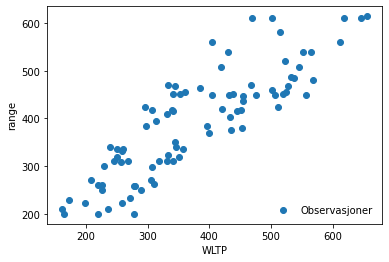

In [35]:
from matplotlib import pyplot as plt
import numpy as np

fig,ax=plt.subplots()

#adding axis lables:
ax.set_ylabel('range')
ax.set_xlabel('WLTP')

#plotting the function:
ax.scatter(g_df["Rekkevidde i testen"], g_df['Oppgitt WLTP'],  label='Observasjoner')
ax.legend(loc='lower right',frameon=False)




In [38]:
g_df['Oppgit WLTP'] = g_df['Oppgitt WLTP'].astype(float)


y=pd.DataFrame((g_df['log_Oppgitt_WLTP']))

pd.DataFrame(y)

,log_Oppgitt_WLTP
0,370
1,376
2,332
3,415
4,468
...,...
83,415
84,409
85,450
86,451


In [39]:
g_df['Rekkevidde i testen'] = g_df['Rekkevidde i testen'].astype(float)

x=pd.DataFrame((g_df['log_Rekkevidde_i_testen']))
x['intercept']=1
x

,log_Rekkevidde_i_testen,intercept
0,399.0,1
1,436.0,1
2,259.0,1
3,341.0,1
4,528.1,1
...,...,...
83,445.4,1
84,332.0,1
85,506.0,1
86,438.9,1


In [40]:
from statsmodels.regression.linear_model import OLS

res=OLS(y,x).fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       log_Oppgitt_WLTP   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     238.2
Date:                Thu, 23 Jun 2022   Prob (F-statistic):           1.64e-26
Time:                        17:53:20   Log-Likelihood:                -480.91
No. Observations:                  88   AIC:                             965.8
Df Residuals:                      86   BIC:                             970.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
log_Rekkevidde_i_testen   

In [41]:
res.params

log_Rekkevidde_i_testen     0.784947
intercept                  95.817899
dtype: float64

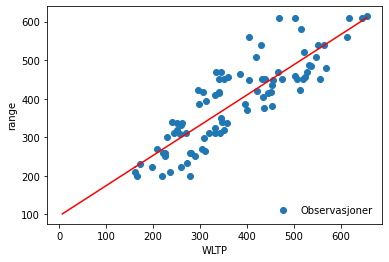

In [43]:




x=np.linspace(min((g_df['log_Rekkevidde_i_testen'])), max((g_df['log_Rekkevidde_i_testen'])), 500)

regression_line=res.params['intercept']+res.params['log_Rekkevidde_i_testen']*x


ax.plot(x, regression_line,color='red')
fig




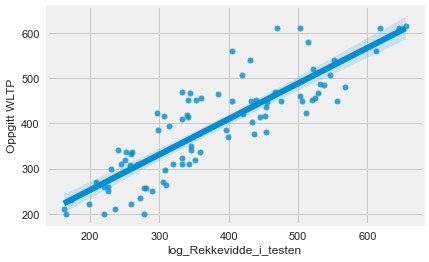

In [46]:
#autoviz
import seaborn as sns
sns.regplot(x=g_df['log_Rekkevidde_i_testen'], y=g_df['Oppgitt WLTP'], data=g_df)
plt.show()

Shape of your Data Set loaded: (88, 8)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    7 Predictors classified...
        1 variables removed since they were ID or low-information variables

################ Regression problem #####################


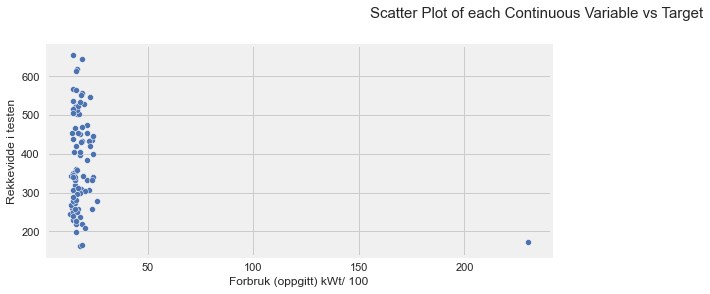

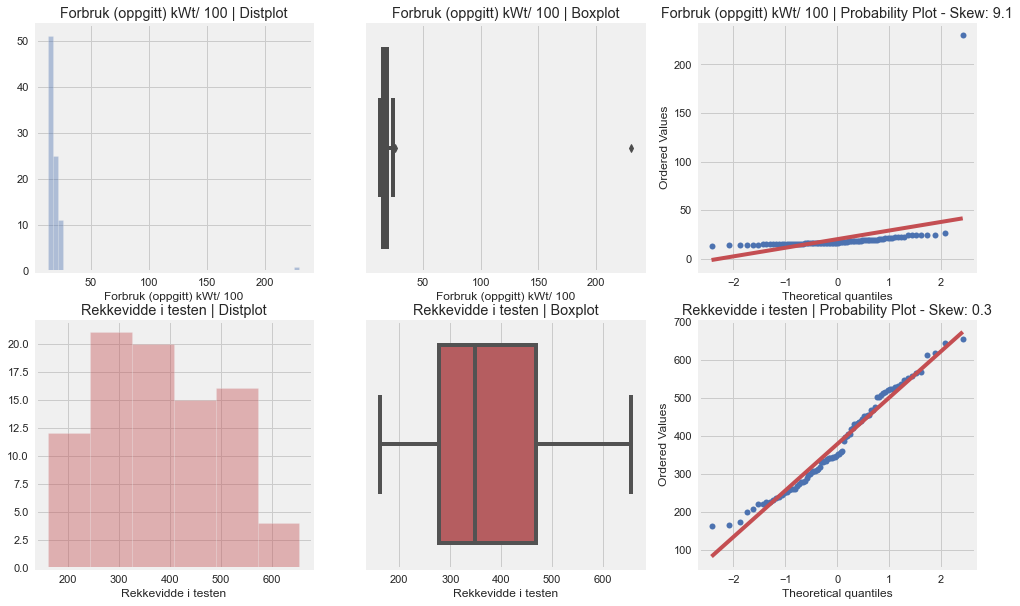

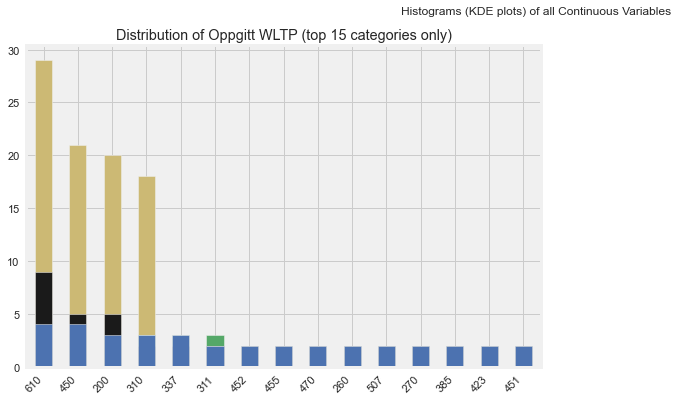

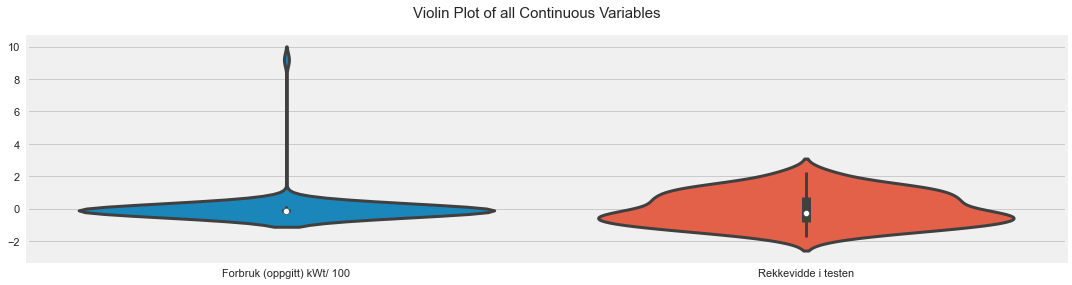

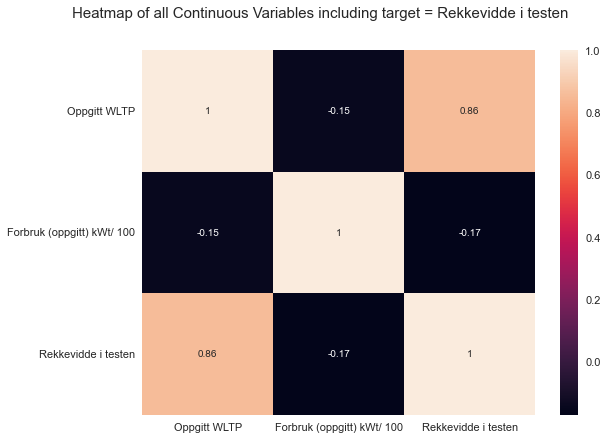

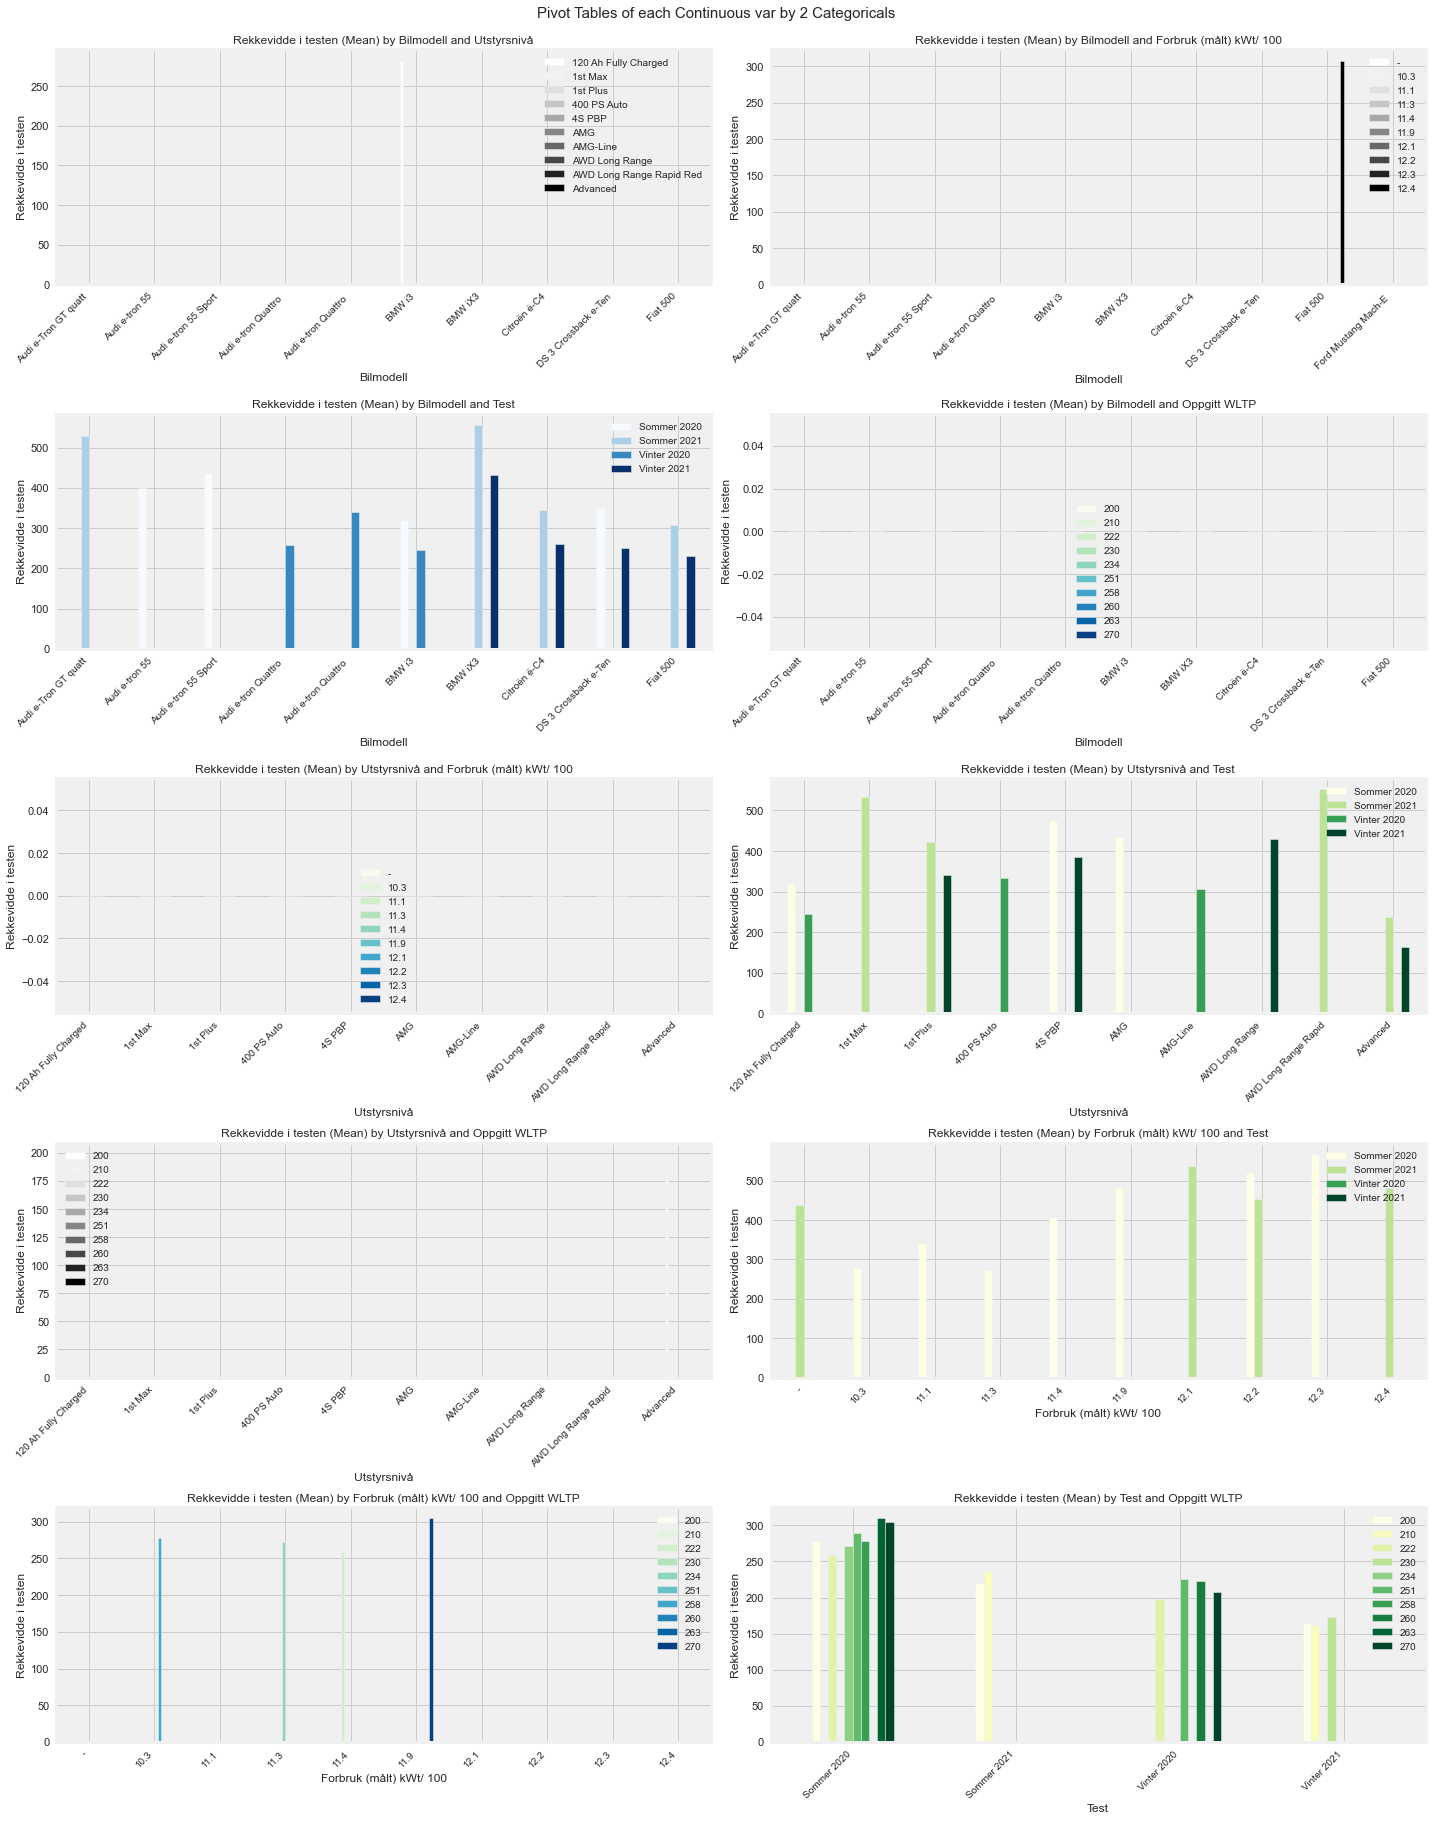

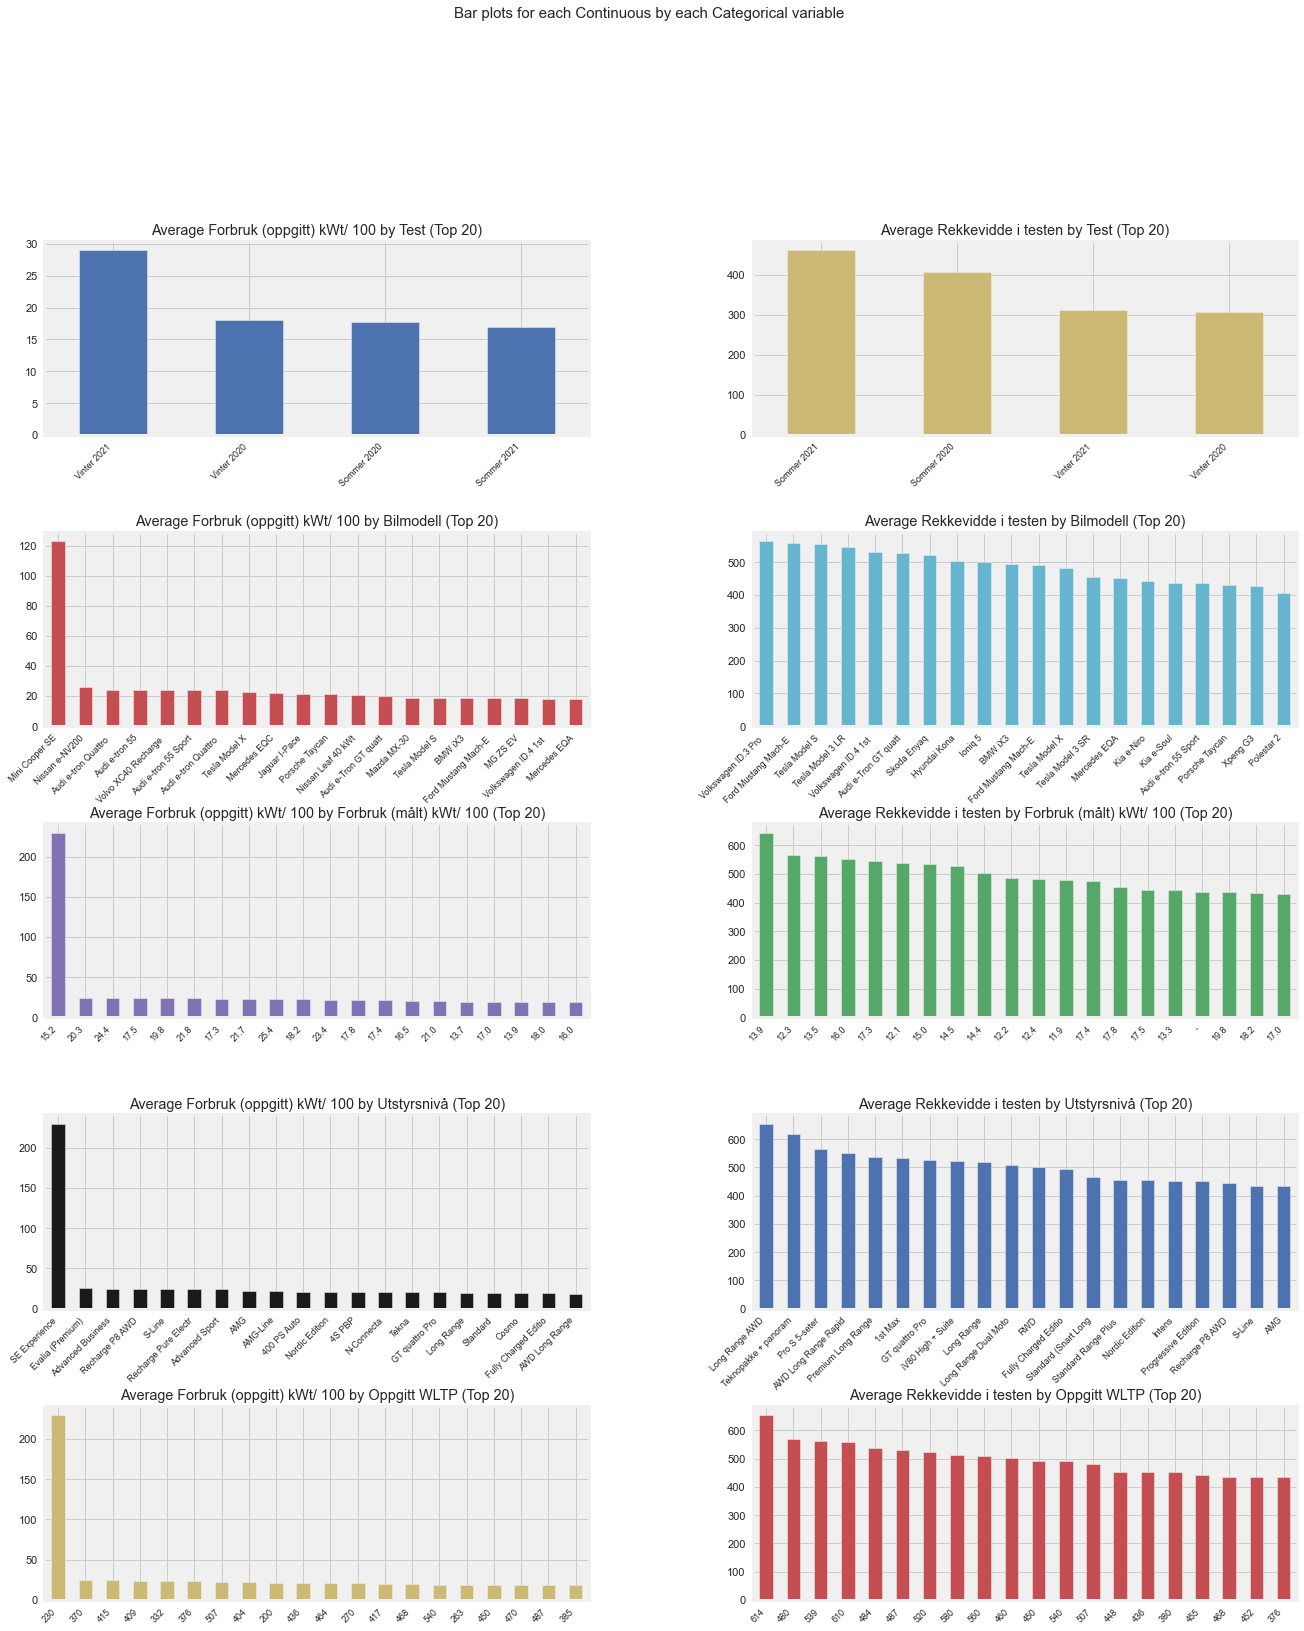

All Plots done
Time to run AutoViz = 5 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [47]:
#autoviz
#import seaborn as sns
#sns.regplot(x=g_df['log_Rekkevidde_i_testen'], y=g_df['Oppgitt WLTP'], data=g_df)
#plt.show()
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline

AV = AutoViz_Class()

viz = AV.AutoViz("wltp.csv", sep=";", depVar= "Rekkevidde i testen")

    